# Thông tin chung

**Mục tiêu**

- Giới thiệu về bài toán gom cụm dữ liệu.
- Giới thiệu hai thuật toán gom cụm K-means và Mean Shift.

**Kết quả đạt được**

Sinh viên sau khi thực hành sẽ:
- Nắm vững được hai thuật toán gom cụm dữ liệu.
- Cài đặt được các ví dụ thực hành

**Thời gian thực hành:** 3 tiết

**Công cụ thực hành:** Google Colab, Anaconda

# Nội dung lý thuyết

Gom cụm _(clustering)_ dựa vào sự phân chia các đối tượng vào các cụm sao cho các đối tượng cùng một cụm tương tự với nhau hơn những đối tượng thuộc cụm khác.

Một số thuật toán gom cụm phổ biến:

- K-means
- Mean-Shift
- DBSCAN
- Hierarchical Clustering

**Thuật toán K-means**: gom các đối tượng vào k cụm sao cho khoảngt cách của các đối tượng đến tâm của cụm nhỏ nhất.

_Các bước thực hiện theo các bước sau_:

- Bước 1. Chọn ngẫu nhiên k điểm từ tập dữ liệu làm tâm cho k cụm.
- Bước 2. Gom các điểm vào cụm có khoảng cách từ tâm đến nó gần nhất. 
- Bước 3. Nếu việc gom dữ liệu không thay đổi so với lần thực hiện trước thì dừng thuật toán.
- Bước 4. Xác định lại tâm mới của k cụm bằng cách tính trung bình cộng của tất cả các điểm dữ liệu trong cụm
- Bước 5. Quay lại bước 2.

# Nội dung thực hành

## Mô tả bài toán

Phân loại khách hàng
Dữ liệu: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

- CustomerID
- Gender
- Age
- Annual Income (k$): thu nhập mỗi năm
- Spending Score (1-100): tổng điểm có được khi mua hàng

Hãy phân loại khách hàng thành những nhóm tương tự nhau.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Mall_Customers.csv')
data.head()

C:\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data.shape

(200, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


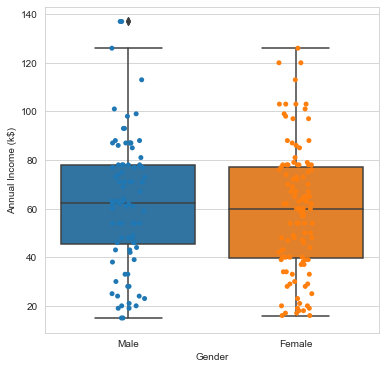

In [6]:
plt.figure(figsize = (6, 6))

sns.set_style('whitegrid')

ax = sns.boxplot(x = "Gender", y = "Annual Income (k$)", data = data)
ax = sns.stripplot(x = 'Gender', y = 'Annual Income (k$)', data = data)

plt.show()

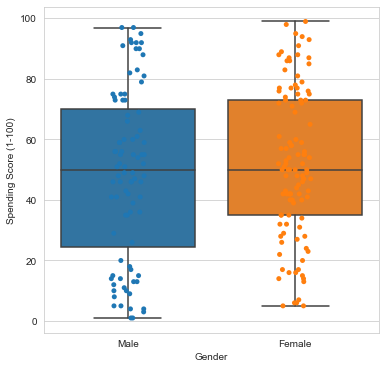

In [7]:
plt.figure(figsize = (6, 6))

sns.set_style('whitegrid')

ax = sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data = data)
ax = sns.stripplot(x = 'Gender', y = 'Spending Score (1-100)', data = data)

plt.show()

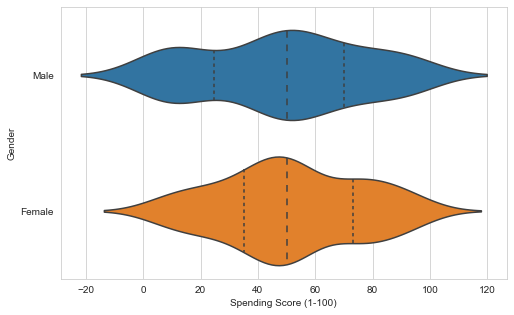

In [8]:
plt.figure(figsize = (8, 5))

sns.violinplot(x = data['Spending Score (1-100)'], y = data['Gender'], inner='quartile')

plt.show()

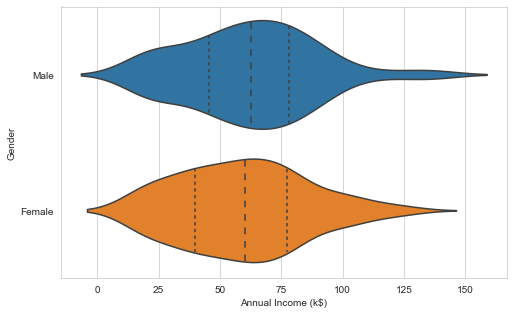

In [9]:
plt.figure(figsize = (8, 5))

sns.violinplot(x = data['Annual Income (k$)'], y = data['Gender'], inner='quartile')

plt.show()

In [10]:
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [11]:
corr_matrix = data[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]].corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


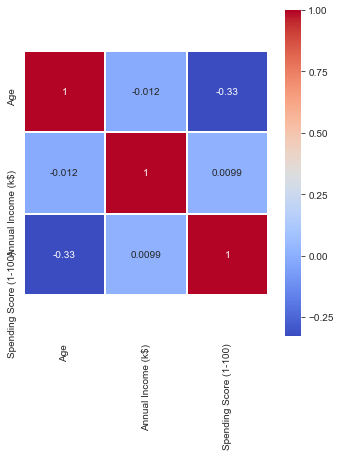

In [12]:
plt.figure(figsize = (6, 6))

ax = sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', square = True, linewidths = 1)

## Đoạn lệnh sửa lỗi mất dòng đầu, dòng cuối ở phiên bản matplotlib 3.1.1
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##

plt.show()

<Figure size 432x432 with 0 Axes>

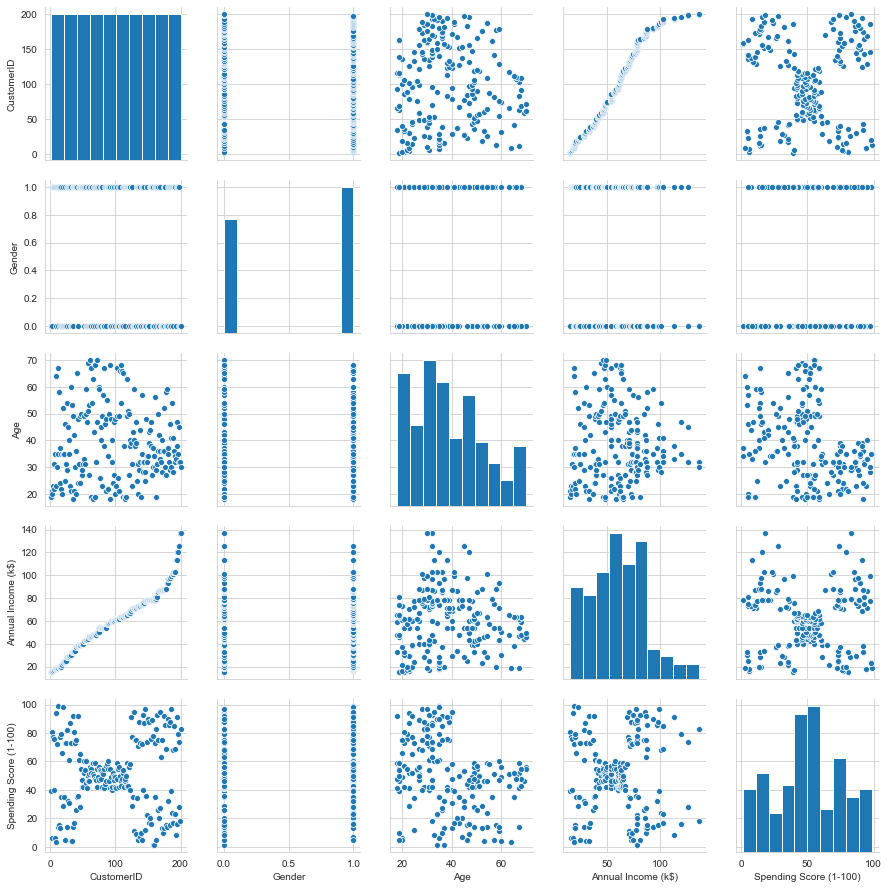

In [13]:
plt.figure(figsize = (6, 6))

sns.pairplot(data)

plt.show()

- Ta sẽ gom cụm dựa vào hai thuộc tính Annual Income (k$) và Spending Score (1-100).

In [14]:
X = data.iloc[:, [3, 4]].values

In [15]:
from sklearn.cluster import KMeans
wcss = []

# k = 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

- Áp dụng thuật toán Elbow _(gấp khúc)_ để tìm k-cụm.

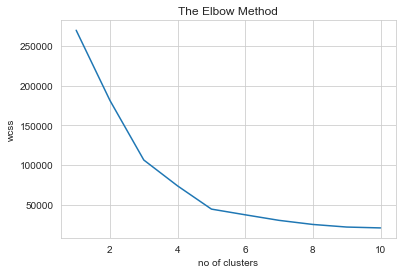

In [16]:
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')

plt.show()

- Chọn số cụm cần gom nhóm k = 5.

In [17]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeansmodel.fit_predict(X)

In [18]:
labels = kmeansmodel.labels_
labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
centroids = kmeansmodel.cluster_centers_
centroids

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

- Biểu đồ trực quan quan các k cụm dữ liệu.

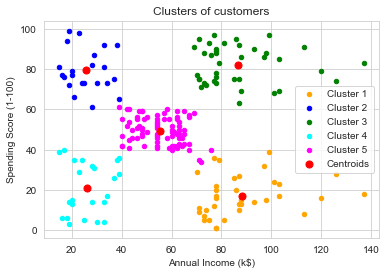

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 50, c = 'red', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

In [21]:
clusters = labels.tolist()

In [22]:
result = data[[ 'Annual Income (k$)', 'Spending Score (1-100)' ]]

result['ID'] = data['CustomerID']
result['clusters'] = pd.Series(clusters)
result.head()

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Annual Income (k$),Spending Score (1-100),ID,clusters
0,15,39,1,3
1,15,81,2,1
2,16,6,3,3
3,16,77,4,1
4,17,40,5,3


# Bài tập

- Tiếp tục với ví dụ, sinh viên tự cài đặt các thuật toán gom cụm đã được học.